In [6]:
import random

random_numbers = [random.randint(0, 70) for _ in range(500)]
# print(random_numbers)

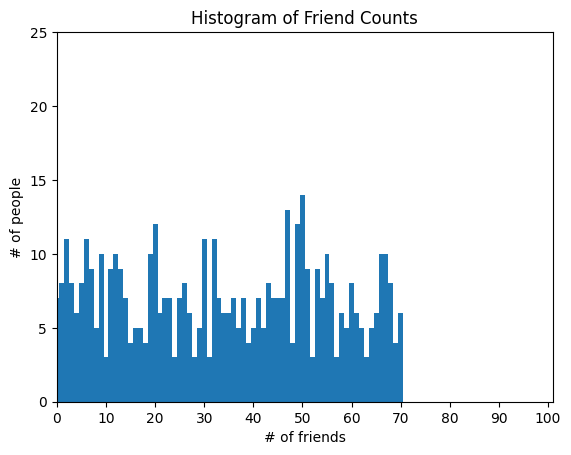

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
friend_counts = Counter(random_numbers)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys,1)
plt.axis([0, 101, 0, 25])
plt.xticks(range(0,110,10))
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()


### Central Tendencies


In [12]:
def mean(xs: list[float]) -> float:
    return sum(xs) / len(xs)
mean(random_numbers)

34.236

- unlike the mean—the median doesn’t fully depend on every
value in your data

In [13]:
def _median_odd(xs: list[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]


def _median_even(xs: list[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2


def median(v: list[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)


In [16]:
median([1, 10, 2, 9, 5])
median([1, 9, 2, 10]) 
median(random_numbers)

34.0

- mean is simpler to compute, and it varies smoothly as our data
changes. If we have n data points and one of them increases by some small
amount e, then necessarily the mean will increase by e / n

- mean is very sensitive to outliers in our data.

- generalization of the median is the quantile, which represents the value
under which a certain percentile of the data lies (the median represents the
value under which 50% of the data lies):

In [17]:
def quantile(xs: list[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]


In [20]:
num_friends=random_numbers
print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

6
16
51
63


In [22]:
def mode(x: list[float]) -> list[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [23]:
set(mode(num_friends))

{50}

### Dispersion

#### Range

In [ ]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: list[float]) -> float:
    return max(xs) - min(xs)


#### variance

In [24]:
Vector = list[float]


In [26]:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


In [27]:
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [28]:
def de_mean(xs: list[float]) -> list[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]
def variance(xs: list[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

#### standard deviation

In [30]:
import math
def standard_deviation(xs: list[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))


In [31]:
def interquartile_range(xs: list[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)


In [32]:
interquartile_range(num_friends)

35

#### Correlation